# 2D Neural Style Transfer

This is the Jupyter Notebook for 2D NST.

## Step 0: imports

In [3]:
import sys
import torch

# install KeOps kernels
!pip install -q pykeops==1.4.1 # > install.log

# install pytorch version of np.Interp, which is used for histogram loss
!pip install -q git+https://github.com/aliutkus/torchinterp1d.git

# Please run the following two lines DEPENDENTLY! (depends on whether the notebook is run locally or on Colab)
!git clone https://github.com/wmd0701/MA.git NST
%cd NST

# import self-defined functions
from utils.data_loader import image_loader, image_unloader
from utils.pipeline import pipeline_2D_NST
from utils.plot import plot_losses_2D_NST

# better plot
%pylab inline

Cloning into 'NST'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 68 (delta 3), reused 65 (delta 2), pack-reused 0
Unpacking objects: 100% (68/68), done.
/content/NST


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Populating the interactive namespace from numpy and matplotlib


## Step 1: load images

torch.Size([1, 3, 256, 384])


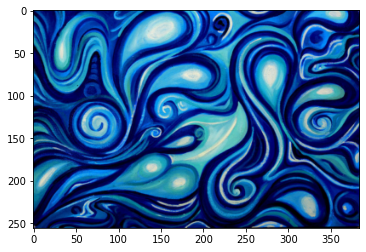

torch.Size([1, 3, 256, 256])


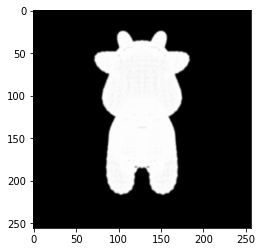

In [7]:
style_img = image_loader("./image_style/blue_swirls.jpg", imsize=256, tiling=1)
content_img = image_loader("./image_content/sil_cow_grayscale.png", imsize=256)

print(style_img.shape)
imshow(image_unloader(style_img));show()
print(content_img.shape)
imshow(image_unloader(content_img))

## Step 2: run NST pipeline

Building the style transfer model..

c:  64   h: 256   w: 384
c: 128   h: 128   w: 192
c: 256   h:  64   w:  96
c: 512   h:  32   w:  48

Style model is as follow:
Sequential(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU()
  (style_loss_1_1): StyleLoss(
    (mask_layer): GetMask()
  )
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU()
  (style_loss_2_1): StyleLoss(
    (mask_layer): GetMask()
  )
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_1): ReLU()
  (style_loss_3_1): StyleLo

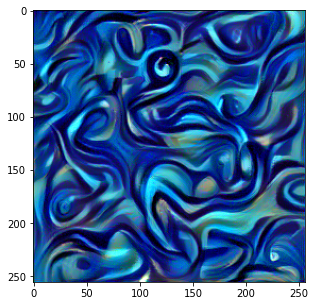

In [14]:
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1']
style_weights = [1e6/n**2 for n in [64,128,256,512]]

content_layers = ['conv4_2']
content_weights = [1]

model_pooling = 'max'
mask_pooling = 'avg'
n_iters = 200
learning_rate = 1
need_content = False

# types of style losses to be considered
style_loss_types = {#'gram':1,
                    'bnst':1,
                    #'morest':1e-1,
                    #'histo':1,
                    #'linear':1,
                    #'poly':1,
                    #'rbf':1e2,
                    }

# input image tensor
# input_img = torch.rand(style_img.shape, device=input_img.device)
input_img = torch.rand(content_img.shape, device=content_img.device)
# input_img = content_img.clone()

# masking
mask_img = None # image_loader("image_content/sil_cow_grayscale.png", imsize = input_img.shape[-2:], mask = True)
masking = False

output_img, loss_history,style_losses = pipeline_2D_NST(style_img = style_img, 
                                                        content_img = content_img,
                                                        input_img = input_img,
                                                        mask_img = mask_img,
                                                        n_iters = n_iters,
                                                        style_weights = style_weights,
                                                        content_weights = content_weights,
                                                        style_layers = style_layers,
                                                        content_layers = content_layers,
                                                        style_loss_types = style_loss_types,
                                                        learning_rate = learning_rate,
                                                        need_content = need_content,
                                                        masking = masking,
                                                        model_pooling = model_pooling,
                                                        mask_pooling = mask_pooling,
                                                        silent = False)
 

imshow(image_unloader(output_img))
gcf().set_size_inches(5,5)

## Step 3: loss plot

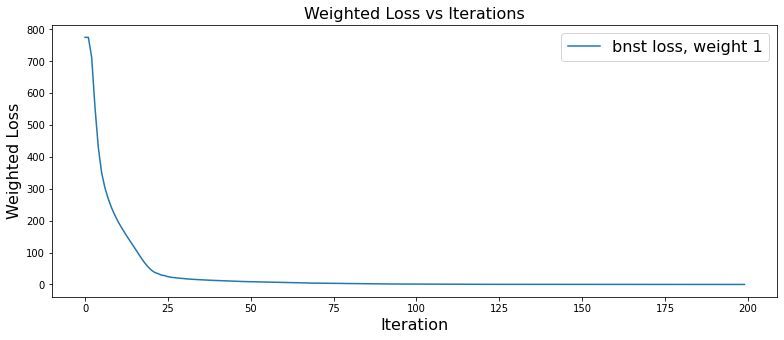

In [15]:
plot_losses_2D_NST(loss_history, loss_name = None, start = 0, end = n_iters)